In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'master_sheet.xlsx'
happiness_file = pd.read_excel(file_path, sheet_name='PROCESSED_HAPPINESS')
income_file = pd.read_excel(file_path, sheet_name='PROCESSED_INCOME')

# Function to convert the row in .xlsx to a NumPy array
def convert(row_index, data):
    temp_row_series = data.iloc[row_index].iloc[2:]
    return temp_row_series


163


# Rich countries
Income vs happiness

In [32]:
happiness = []
income = []

no_countries = len(happiness_file)

for i in range(no_countries):
    happiness.append(convert(i,happiness_file).to_numpy())
    income.append(convert(i,income_file).to_numpy())


In [33]:
## Data processing to create line of best fit


# Combines all the INCOME into one array and the HAPPINESS into another array
INC_combined = np.concatenate(income)
HAP_combined  = np.concatenate(happiness)

# Ensures all values are numeric by converting all to None to NaN
INC_combined = pd.to_numeric(INC_combined, errors='coerce')
HAP_combined = pd.to_numeric(HAP_combined , errors='coerce')

# The mask will filter out all combos of INCOME and HAPPINESS (x,y) where at least one is NaN
mask = ~np.isnan(INC_combined) & ~np.isnan(HAP_combined) # Only returns true if both are numbers (due to & operator)
INC_combined = INC_combined[mask]
HAP_combined = HAP_combined[mask]

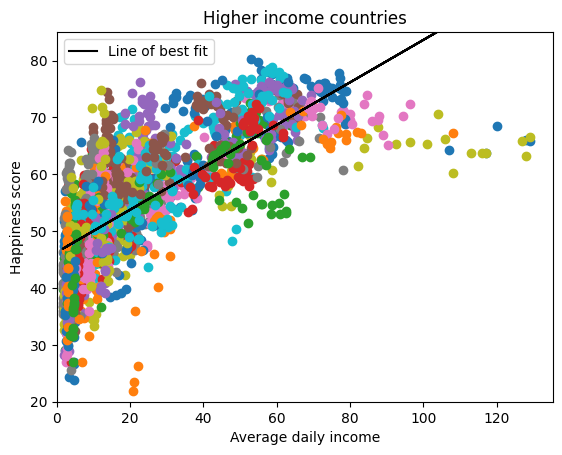

R-value: 0.7340419331121394


In [45]:

countries = ['singapore','usa','uk','australia','canada','switzerland','denmark']

for i in range(no_countries):
    plt.scatter(income[i],happiness[i])

slope, intercept = np.polyfit(INC_combined, HAP_combined, 1)    # Calculates the slope and y int for LOBF
line_y = slope * INC_combined + intercept                     # Plugging into y = mx + c!
plt.plot(INC_combined, line_y, c='black', label='Line of best fit')

plt.title('Higher income countries')
plt.xlabel('Average daily income')
plt.ylabel('Happiness score')

# x and y limits for zooming in
plt.xlim(left=0)
plt.ylim(bottom=20, top=85)

plt.legend()
plt.show()

r_value = np.corrcoef(INC_combined, HAP_combined)[0, 1]     # Function in numpy that calculates the R-value
print("R-value:", r_value)